In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stations = pd.read_csv('../data/ev_charging_stations.csv')
sessions = pd.read_csv('../data/ev_charging_sessions.csv')
times = pd.read_csv('../data/ev_charging_times.csv')

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import matplotlib.font_manager as fm 

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

## 데이터 확인

In [2]:
stations.head(1)

,충전소명,주소,위도,경도,충전소 용량(kW),전체,완속,급속,콘센트
0,강동구청,서울 강동구 성내로 25(강동구청),37.52983,127.124847,200,2,0,2,0


In [11]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   충전소명        186 non-null    object 
 1   주소          186 non-null    object 
 2   위도          186 non-null    float64
 3   경도          186 non-null    float64
 4   충전소 용량(kW)  186 non-null    int64  
 5   전체          186 non-null    int64  
 6   완속          186 non-null    int64  
 7   급속          186 non-null    int64  
 8   콘센트         186 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 13.2+ KB


In [5]:
stations.describe()

,위도,경도,충전소 용량(kW),전체,완속,급속,콘센트
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0
mean,37.563220,127.005021,139.430108,2.290323,0.387097,1.903226,0.0
std,0.056232,0.083110,200.604756,2.385001,1.120157,2.208409,0.0
min,37.467205,126.804828,7.000000,1.000000,0.000000,0.000000,0.0
25%,37.515700,126.936795,50.000000,1.000000,0.000000,1.000000,0.0
50%,37.564833,127.028423,82.000000,1.500000,0.000000,1.000000,0.0
75%,37.604061,127.064906,200.000000,2.000000,0.000000,2.000000,0.0
max,37.689751,127.172786,1500.000000,15.000000,10.000000,15.000000,0.0


In [2]:
sessions.head(5)

,날짜,충전소명,충전기 유형,충전량(kWh)
0,2025-10-30,송월동차고지,급속,68.40
1,2025-10-30,송월동차고지,급속,94.97
2,2025-10-30,송월동차고지,급속,105.45
3,2025-10-30,누상공영주차장,완속,15.77
4,2025-10-30,올림픽기념국민생활관,완속,30.83


In [12]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54252 entries, 0 to 54251
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        54252 non-null  object 
 1   충전소명      54252 non-null  object 
 2   충전기 유형    54252 non-null  object 
 3   충전량(kWh)  54252 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [7]:
sessions.describe()

,충전량(kWh)
count,54252.000000
mean,64.632529
std,55.317732
min,0.000000
25%,24.630000
50%,48.085000
75%,90.872500
max,568.110000


In [28]:
times.head(5)

,station_name,start_time,end_time,energy_kw
0,어린이대공원 구의문 주차장 복합충전소,2025-10-31 10:19:11,2025-10-31 10:20:00,0.707
1,명일동 거주자주차장 134번(가로등),2025-10-31 10:17:18,2025-10-31 10:18:26,0.340
2,"영동대로85길 노상공영주차장(대명중학교 뒤, 가로등)",2025-10-31 10:16:40,2025-10-31 10:18:42,0.690
3,수락산디자인거리,2025-10-31 10:13:24,2025-10-31 10:18:13,6.030
4,"을지로 노상공영주차장(하나은행 앞, 가로등)",2025-10-31 10:11:40,2025-10-31 10:19:47,1.850


In [9]:
times.describe()

,충전량(kW)
count,194877.000000
mean,21.018247
std,134.862984
min,-35707.730000
25%,9.250000
50%,18.980000
75%,30.830000
max,46702.020000


In [10]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194877 entries, 0 to 194876
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   충전소명     194877 non-null  object 
 1   충전시작시간   194877 non-null  object 
 2   충전종료시간   194877 non-null  object 
 3   충전량(kW)  194877 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.9+ MB


## 데이터 열 이름, 타입 변환

In [2]:
stations.rename(columns={
    '충전소명': 'station_name',
    '주소': 'address',
    '위도': 'latitude',
    '경도': 'longitude',
    '충전소 용량(kW)': 'capacity_kw',
    '전체': 'total_chargers',
    '완속': 'slow_chargers',
    '급속': 'fast_chargers',
    '콘센트': 'outlet_chargers'
}, inplace=True)

sessions.rename(columns={
    '날짜': 'charge_date',
    '충전소명': 'station_name',
    '충전기 유형': 'charger_type',
    '충전량(kWh)': 'energy_kwh' 
}, inplace=True)

times.rename(columns={
    '충전소명': 'station_name',
    '충전시작시간': 'start_time',
    '충전종료시간': 'end_time',
    '충전량(kW)': 'energy_kwh'   # energy_kw에서 energy_kwh로 변경
}, inplace=True)

In [3]:
sessions['charge_date'] = pd.to_datetime(sessions['charge_date'])
times['start_time'] = pd.to_datetime(times['start_time'])
times['end_time'] = pd.to_datetime(times['end_time'])

In [5]:
stations[stations['station_name'].str.contains('농수산')]

,station_name,address,latitude,longitude,capacity_kw,total_chargers,slow_chargers,fast_chargers,outlet_chargers
18,마포농수산물시장,"서울 마포구 월드컵로 235(마포농수산물시장,마포구시설관리공단)",37.565199,126.898483,450,5,0,5,0


In [14]:
stations.head(5)

,station_name,address,latitude,longitude,capacity_kw,total_chargers,slow_chargers,fast_chargers,outlet_chargers
0,강동구청,서울 강동구 성내로 25(강동구청),37.529830,127.124847,200,2,0,2,0
1,도곡2동 주민센터,서울 강남구 남부순환로378길 34-9(도곡2동주민센터),37.483704,127.046396,100,1,0,1,0
2,사당문화회관 부설주차장,서울 동작구 사당동 232-1,37.484112,126.967629,50,1,0,1,0
3,빙수골 거주자우선주차장,서울 동작구 상도동 299-16,37.495352,126.931895,50,1,0,1,0
4,논현문화마루,서울 강남구 논현동 40-5,37.513892,127.027106,100,1,0,1,0


In [13]:
sessions.head(5)

,charge_date,station_name,charger_type,energy_kwh
0,2025-10-30,송월동차고지,급속,68.40
1,2025-10-30,송월동차고지,급속,94.97
2,2025-10-30,송월동차고지,급속,105.45
3,2025-10-30,누상공영주차장,완속,15.77
4,2025-10-30,올림픽기념국민생활관,완속,30.83


In [15]:
times.head(5)

,station_name,start_time,end_time,energy_kw
0,어린이대공원 구의문 주차장 복합충전소,2025-10-31 10:19:11,2025-10-31 10:20:00,0.707
1,명일동 거주자주차장 134번(가로등),2025-10-31 10:17:18,2025-10-31 10:18:26,0.340
2,"영동대로85길 노상공영주차장(대명중학교 뒤, 가로등)",2025-10-31 10:16:40,2025-10-31 10:18:42,0.690
3,수락산디자인거리,2025-10-31 10:13:24,2025-10-31 10:18:13,6.030
4,"을지로 노상공영주차장(하나은행 앞, 가로등)",2025-10-31 10:11:40,2025-10-31 10:19:47,1.850


In [16]:
times.loc[times['station_name']=='송월동차고지']

,station_name,start_time,end_time,energy_kw
78,송월동차고지,2025-10-31 08:02:35,2025-10-31 08:42:39,26.660
114,송월동차고지,2025-10-31 06:28:57,2025-10-31 10:20:04,27.093
393,송월동차고지,2025-10-30 18:09:04,2025-10-31 00:14:22,42.391
440,송월동차고지,2025-10-30 17:07:02,2025-10-30 17:45:50,24.100
441,송월동차고지,2025-10-30 17:06:09,2025-10-30 17:37:50,23.590
...,...,...,...,...
194322,송월동차고지,2025-01-02 08:50:52,2025-01-02 09:30:17,25.470
194348,송월동차고지,2025-01-02 08:01:01,2025-01-02 10:22:55,16.828
194675,송월동차고지,2025-01-01 13:37:00,2025-01-01 14:23:26,55.540
194679,송월동차고지,2025-01-01 13:35:37,2025-01-01 14:23:57,15.920


## 데이터 검증 

### 1. 전력량 단위 검증 
- **공식**
  - 전력량(kWh) = 전력(kW) * 시간(h)

- **비교 대상**
  - `times.energy_kw`: 충전소 단위 시간별 충전량 (kWh)
  - `sessions.energy_kwh`: 충전기 단위 일별 충전량 (kWh)

- **결론**
  > `times`는 충전소 단위 시간별 로그 데이터,  
  > `sessions`는 충전기 단위 일별 요약 데이터  
  >  
  > `times.energy_kw`는 전력(kw)가 아니라, 이미 시간(h)이 반영된 전력량(kWh)을 기록하고 있으므로 컬럼 이름 변경

### 2. 테이블 간 station_name 일관성 검증
- stations에 있는 모든 충전소는 times와 sessions에 모두 정보가 있음
- times에만 있는 충전소는 48개, sessions에만 있는 충전소는 10개 
- times와 sessions에 stations에는 없는 충전소들이 존재 

- **결론**
  > stations 테이블에 등록된 공식 충전소만을 기준으로 데이터 탐색해야함 

### 3. 충전소별 다중 세션 존재 여부 검증

- **결론**
  > 동일한 충전소(station_name), 날짜(charge_date), 충전기유형(charger_type) 조합이 데이터상에서 여러 행으로 존재하는지 확인
  > 충전소 단위로 분석하려면 groupby(['charge_date', 'station_name', 'charger_type'])를 통해 합산이 필요

### 4. 동일 충전소/동일 날짜 간 충전량 일치 검증
- 동일한 충전소(station_name)·날짜(charge_date) 기준으로
sessions.energy_kwh 합계와 times.energy_kwh 합계 간의 차이는
미세한 오차 수준임

- **결론**
  > times는 sessions의 시간 단위 세분화 로그임

In [37]:
# sessions에서 송월동차고지의 2025-10-30 총 충전량
sessions_sum = sessions[
    (sessions['station_name']=='송월동차고지') &
    (sessions['charge_date']==pd.Timestamp('2025-10-30'))
]['energy_kwh'].sum()

# times에서 동일 조건의 충전시간 * energy_kw 총합
times_filtered = times[
    (times['station_name'] == '송월동차고지') &
    (times['start_time'].dt.date == pd.Timestamp('2025-10-30').date())
].copy()

# 충전 시간
times_filtered['duration_h'] = (times_filtered['end_time'] - times_filtered['start_time']).dt.total_seconds() / 3600

# 시간 * energy_kw
times_filtered['calc_kwh'] = times_filtered['duration_h'] * times_filtered['energy_kw']

times_sum = times_filtered['calc_kwh'].sum()

print("sessions 총 에너지량 (kWh):", round(sessions_sum, 3))
print("times (시간×전력) 총합 (kWh):", round(times_sum, 3))
print("차이(diff):", round(sessions_sum - times_sum, 3))

sessions 총 에너지량 (kWh): 268.82
times (시간×전력) 총합 (kWh): 436.206
차이(diff): -167.386


In [38]:
times_sum_correct = times[
    (times['station_name'] == '송월동차고지') &
    (times['start_time'].dt.date == pd.Timestamp('2025-10-30').date())
]['energy_kw'].sum()

print("sessions 총 에너지량 (kWh):", round(sessions_sum, 3))
print("times (단순 합) 총합 (kWh):", round(times_sum_correct, 3))
print("차이(diff):", round(sessions_sum - times_sum_correct, 3))

sessions 총 에너지량 (kWh): 268.82
times (단순 합) 총합 (kWh): 311.211
차이(diff): -42.391


In [17]:
# 컬럼 이름 변경
times.rename(columns={'energy_kw': 'energy_kwh'}, inplace=True)

In [18]:
times.columns

Index(['station_name', 'start_time', 'end_time', 'energy_kwh', 'hour'], dtype='object')

In [21]:
print(stations.station_name.nunique())
print(sessions.station_name.nunique())
print(times.station_name.nunique())

186
196
234


In [24]:
# times에는 있는데 stations에는 없는 충전소 목록
times_only = set(times['station_name']) - set(stations['station_name'])
times_only = sorted(list(times_only))
times_only

['가락1동 주민센터 (서울에너지공사)',
 '가락금호아파트 (서울에너지공사)',
 '갤러리아팰리스 (서울에너지공사)',
 '거여 어울림아파트 (서울에너지공사)',
 '거여5단지 아파트 (서울에너지공사)',
 '국립한글박물관 지하주차장(주차장 임시폐쇄)',
 '대청역 공영주차장',
 '더샵스타리버 (서울에너지공사)',
 '등마루 공영주차장',
 '래미안베라힐즈 (서울에너지공사)',
 '레이크팰리스 (서울에너지공사)',
 '리센츠 (201동-236동) (서울에너지공사)',
 '리센츠 (237동-265동) (서울에너지공사)',
 '마곡엠밸리9단지 (서울에너지공사)',
 '마곡엠밸리9단지 비주거용 (서울에너지공사)',
 '마장축산물시장 서문 공영주차장',
 '문정1동 주민센터 앞 전기차 충전소',
 '문화비축기지',
 '방배1동 공영주차장 (서울에너지공사)',
 '방배문화센터 (서울에너지공사)',
 '방이금호어울림아파트 (서울에너지공사)',
 '복합문화타운',
 '상계2동 공영주차장',
 '서울 에너지공사 동부지사 (서울에너지공사)',
 '서울 에너지공사 본사 (서울에너지공사)',
 '서울리센츠 아파트',
 '서울연구원',
 '서울혁신파크',
 '송파 두산위브 (서울에너지공사)',
 '송파구 보건지소 (서울에너지공사)',
 '송파구청 지하주차장 (서울에너지공사)',
 '송파책박물관',
 '송파헤븐시티 더 테라스 (위례 A1-12BL) (서울에너지공사)',
 '송파힐스테이트 (서울에너지공사)',
 '시흥4동 공영주차장',
 '신내우디안1단지 (서울에너지공사)',
 '양천 솔라스테이션',
 '영광빌딩 (국민건강보험공단 강서지사) (서울에너지공사)',
 '오금현대백조 (서울에너지공사)',
 '오륜동 주민센터 (서울에너지공사)',
 '위례포레샤인 17단지 (위례 A1-5BL) (서울에너지공사)',
 '적선동 공영주차장',
 '중화 제3공영주차장',
 '청담자이아파트 (서울에너지공사)',
 '청와대 사랑채  주차장',
 '한신코아 (서울에너지공사)',
 '해누리타운 지하주차

In [23]:
# sessions에는 있는데 stations에는 없는 충전소 목록
sessions_only = set(sessions['station_name']) - set(stations['station_name'])

sessions_only = sorted(list(sessions_only))
sessions_only

['국립한글박물관 지하주차장(주차장 임시폐쇄)',
 '대청역 공영주차장',
 '마장축산물시장 서문 공영주차장',
 '문정1동 주민센터 앞 전기차 충전소',
 '문화비축기지',
 '복합문화타운',
 '상계2동 공영주차장',
 '시흥4동 공영주차장',
 '적선동 공영주차장',
 '해누리타운 지하주차장']

In [25]:
# stations에 있는데 times에 없는 충전소 목록
missing_in_times = set(stations['station_name']) - set(times['station_name'])
missing_in_times = sorted(list(missing_in_times))
missing_in_times

[]

In [26]:
# stations에 있는데 sessions에는 없는 충전소 찾기
missing_in_sessions = set(stations['station_name']) - set(sessions['station_name'])
missing_in_sessions = sorted(list(missing_in_sessions))
missing_in_sessions

[]

In [29]:
# sessions에서 동일한 station_name, charge_date, charger_type 조합이 여러 행으로 있음
sessions_filtered = sessions[
    (sessions['station_name'] == '서울월드컵경기장') &
    (sessions['charge_date'] == pd.Timestamp('2025-10-10'))
]

sessions_filtered

,charge_date,station_name,charger_type,energy_kwh
4295,2025-10-10,서울월드컵경기장,급속,139.75
4296,2025-10-10,서울월드컵경기장,급속,72.96
4297,2025-10-10,서울월드컵경기장,급속,28.33
4298,2025-10-10,서울월드컵경기장,급속,38.89


In [9]:
times_filtered = times[
    (times['station_name'] == '서울월드컵경기장') &
    (times['start_time'].dt.date == pd.Timestamp('2025-10-10').date())
]

times_filtered

,station_name,start_time,end_time,energy_kw,hour
14879,서울월드컵경기장,2025-10-10 21:50:27,2025-10-10 22:04:04,20.410,21
14892,서울월드컵경기장,2025-10-10 21:03:52,2025-10-10 21:20:36,15.773,21
14897,서울월드컵경기장,2025-10-10 20:50:13,2025-10-10 21:17:59,32.868,20
14904,서울월드컵경기장,2025-10-10 20:32:05,2025-10-10 20:54:16,23.113,20
15078,서울월드컵경기장,2025-10-10 15:56:34,2025-10-10 16:14:27,40.090,15
15152,서울월드컵경기장,2025-10-10 14:30:39,2025-10-10 15:15:47,28.137,14
15178,서울월드컵경기장,2025-10-10 13:52:48,2025-10-10 15:10:24,25.876,13
15208,서울월드컵경기장,2025-10-10 13:13:27,2025-10-10 13:50:39,28.328,13
15308,서울월드컵경기장,2025-10-10 10:40:28,2025-10-10 11:27:32,46.726,10
15437,서울월드컵경기장,2025-10-10 06:01:41,2025-10-10 06:31:40,18.597,6


In [ ]:
sessions_filtered = sessions[
    (sessions['station_name'] == '송월동차고지') &
    (sessions['charge_date'] == pd.Timestamp('2025-10-10'))
]

sessions_filtered

,charge_date,station_name,charger_type,energy_kwh
4173,2025-10-10,송월동차고지,급속,144.17
4174,2025-10-10,송월동차고지,급속,28.06
4175,2025-10-10,송월동차고지,완속,27.93


In [19]:
times_filtered = times[
    (times['station_name'] == '송월동차고지') &
    (times['start_time'].dt.date == pd.Timestamp('2025-10-10').date())
]

times_filtered

,station_name,start_time,end_time,energy_kwh,hour
15020,송월동차고지,2025-10-10 17:06:00,2025-10-10 17:41:55,26.560,17
15021,송월동차고지,2025-10-10 17:05:11,2025-10-10 17:41:56,27.190,17
15202,송월동차고지,2025-10-10 13:23:39,2025-10-10 14:03:50,28.060,13
15252,송월동차고지,2025-10-10 12:12:04,2025-10-10 12:42:00,44.140,12
15281,송월동차고지,2025-10-10 11:28:27,2025-10-10 11:59:48,46.280,11
15388,송월동차고지,2025-10-10 08:12:54,2025-10-10 12:10:03,27.927,8


In [24]:
# 같은 날, 같은 충전소의 충전량 비교 
station = '남산청사'
date = pd.Timestamp('2025-10-10')

# sessions 필터링
sessions_sum = sessions[
    (sessions['station_name'] == station) &
    (sessions['charge_date'] == date)
]['energy_kwh'].sum()

# times 필터링
times_sum = times[
    (times['station_name'] == station) &
    (times['start_time'].dt.date == date.date())
]['energy_kwh'].sum()

# 오차 계산
diff = round(sessions_sum - times_sum, 4)
diff

np.float64(0.001)

## 데이터 정제 
- stations 기준 필터링

In [27]:
# times와 sessions에서 stations에 존재하지 않는 충전소(station_name)를 가진 행 제거
valid_stations = set(stations['station_name'])
times = times[times['station_name'].isin(valid_stations)].copy()
sessions = sessions[sessions['station_name'].isin(valid_stations)].copy()
len(times), len(sessions)

(166221, 53924)

## 시각화 

### 구별 분석
- 구별 충전소 개수: 각 지역에 설치된 충전소의 수 
- 구별 충전량 합: 해당 지역에서 실제로 사용된 전력량
- 구별 평균 충전량: 충전소 1개당 평균 이용량

### 결론
- 충전소가 많다고 무조건 충전량이 많은 것은 아님
- 충전소 이용률이 높은 구: 서초구, 양천구, 중구, 광진구, 마포구
- 충전소 개수 대비 이용률이 낮은 구: 노원구, 성북구, 구로구, 금천구, 관악구 

In [28]:
# 구 컬럼 추출
stations['gu'] = stations['address'].str.split().str[1]
stations[['station_name', 'gu']].head()

,station_name,gu
0,강동구청,강동구
1,도곡2동 주민센터,강남구
2,사당문화회관 부설주차장,동작구
3,빙수골 거주자우선주차장,동작구
4,논현문화마루,강남구


In [29]:
stations['gu'].value_counts()

gu
노원구     20
강남구     15
중구      13
도봉구     11
마포구     10
양천구      9
동작구      9
중랑구      9
서대문구     8
구로구      8
송파구      8
광진구      8
강동구      7
동대문구     7
성북구      6
관악구      5
은평구      5
성동구      5
종로구      5
강북구      5
영등포구     4
강서구      3
서초구      3
용산구      2
금천구      1
Name: count, dtype: int64

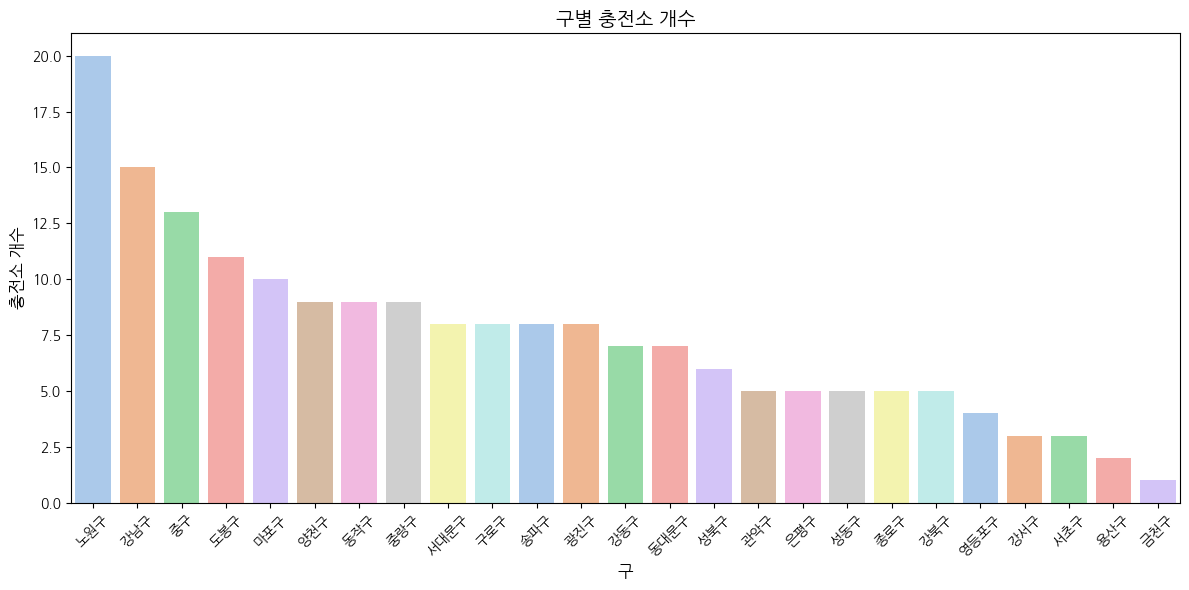

In [33]:
# 구별 충전소 개수 
gu_counts = stations['gu'].value_counts().reset_index()
gu_counts.columns = ['gu', 'station_count']

plt.figure(figsize=(12,6))
sns.barplot(data=gu_counts, x='gu', y='station_count', palette='pastel')
plt.title('구별 충전소 개수', fontsize=14)
plt.xlabel('구', fontsize=12)
plt.ylabel('충전소 개수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# 구별 충전량 
stations_sessions = pd.merge(stations, sessions, on='station_name', how='inner')
gu_usage = stations_sessions.groupby('gu')['energy_kwh'].sum().reset_index().sort_values('energy_kwh', ascending=False)
gu_usage

,gu,energy_kwh
23,중구,385215.92
0,강남구,347694.23
18,양천구,277031.38
12,마포구,239868.70
9,도봉구,237367.49
5,광진구,210187.78
8,노원구,191123.81
13,서대문구,182066.44
17,송파구,152342.59
10,동대문구,146592.34


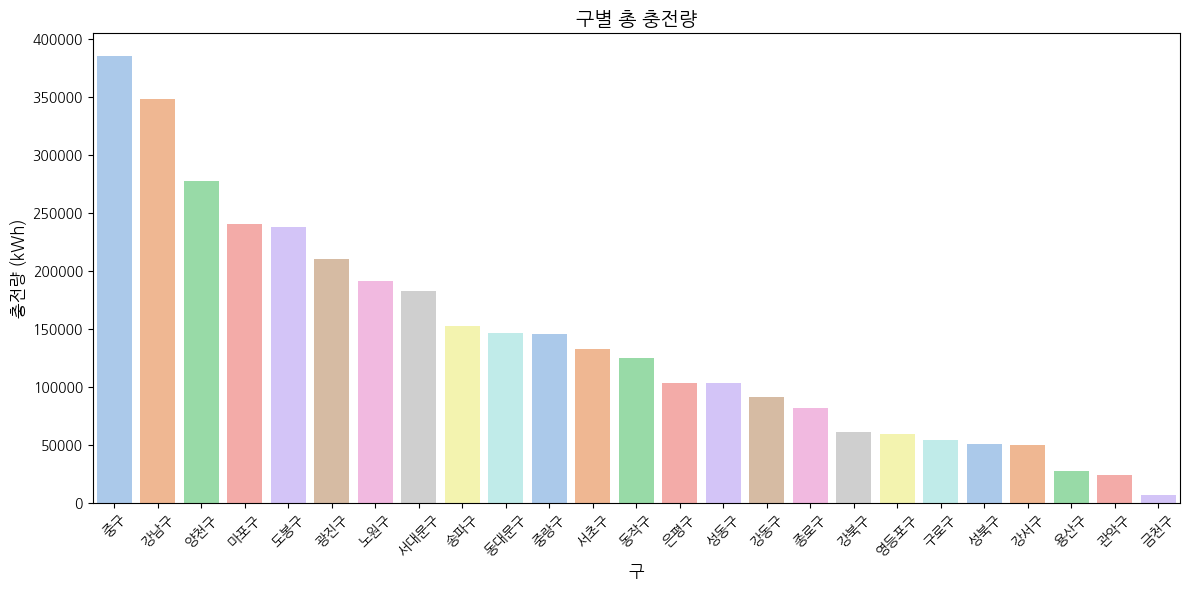

In [35]:
# 구별 총 충전량 
plt.figure(figsize=(12,6))
sns.barplot(
    data=gu_usage,
    x='gu', 
    y='energy_kwh',
    palette='pastel' 
)
plt.title('구별 총 충전량', fontsize=14)
plt.xlabel('구', fontsize=12)
plt.ylabel('충전량 (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
gu_compare = pd.merge(gu_counts, gu_usage, on='gu', how='inner')
gu_compare

,gu,station_count,energy_kwh
0,노원구,20,191123.81
1,강남구,15,347694.23
2,중구,13,385215.92
3,도봉구,11,237367.49
4,마포구,10,239868.70
5,양천구,9,277031.38
6,동작구,9,124926.65
7,중랑구,9,145368.70
8,서대문구,8,182066.44
9,구로구,8,53901.53


In [27]:
# 구별 평균 충전량
gu_compare['avg_energy_per_station'] = gu_compare['energy_kwh'] / gu_compare['station_count']
gu_compare = gu_compare.sort_values('avg_energy_per_station', ascending=False)
gu_compare

,gu,station_count,energy_kwh,avg_energy_per_station
22,서초구,3,132627.26,44209.086667
5,양천구,9,277031.38,30781.264444
2,중구,13,385215.92,29631.993846
11,광진구,8,210187.78,26273.472500
4,마포구,10,239868.70,23986.870000
1,강남구,15,347694.23,23179.615333
8,서대문구,8,182066.44,22758.305000
3,도봉구,11,237367.49,21578.862727
13,동대문구,7,146592.34,20941.762857
16,은평구,5,103171.46,20634.292000


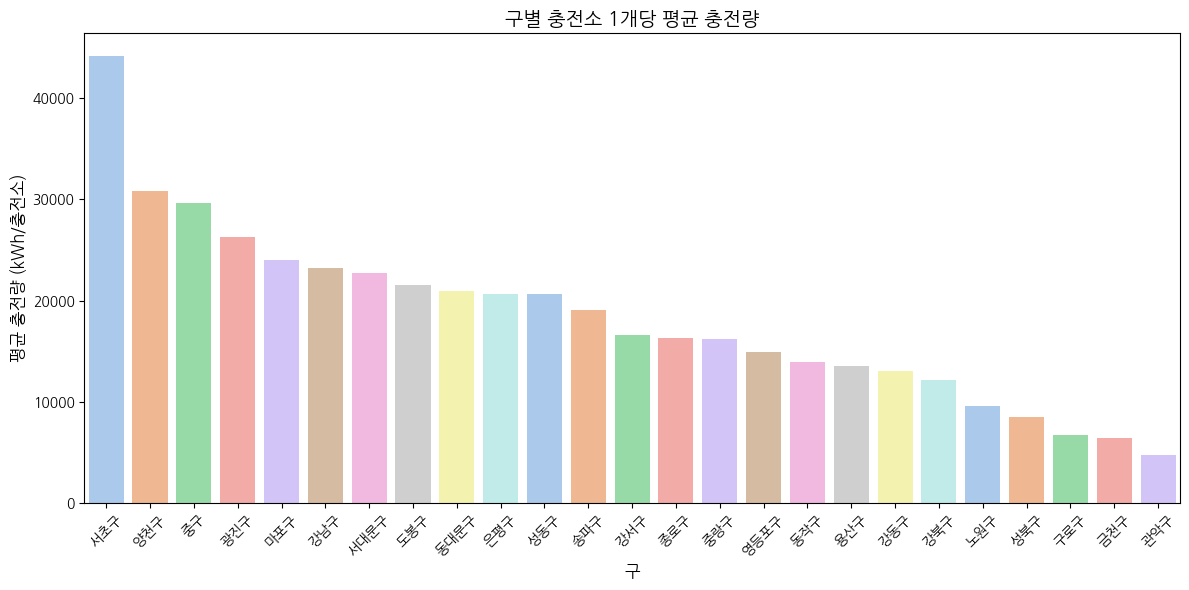

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=gu_compare,
    x='gu',
    y='avg_energy_per_station',
    palette='pastel'
)
plt.title('구별 충전소 1개당 평균 충전량', fontsize=14)
plt.xlabel('구', fontsize=12)
plt.ylabel('평균 충전량 (kWh/충전소)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 시간대별 분석 
- 시간대별 충전량 합
- 급속 완속 충전기에 따른 시간대별 충전량

### 결론
- 급속 충전은 퇴근 시간대(17~18시)에 최대치 
- 완속 충전은 야간~새벽 시간대(18~2시)에 상대적으로 높으므로 주거지역 중심의 장시간 충전 패턴을 확인 

In [21]:
# 시간대 추출
times['hour'] = times['start_time'].dt.hour
times.hour.unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 23, 22, 21, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11], dtype=int32)

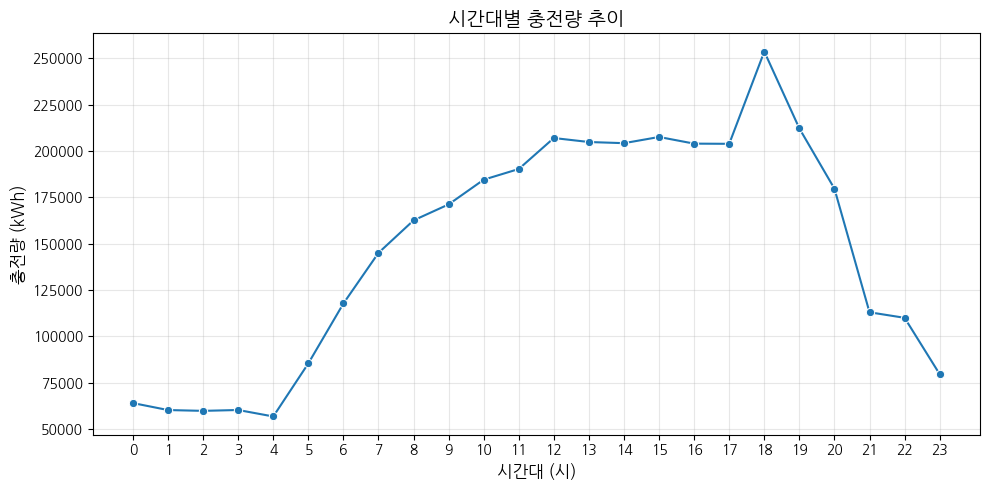

In [ ]:
# 시간대별 충전량
hourly_usage = times.groupby('hour')['energy_kw'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_usage, x='hour', y='energy_kw', marker='o')
plt.title('시간대별 충전량 추이', fontsize=14)
plt.xlabel('시간대 (시)', fontsize=12)
plt.ylabel('충전량 (kWh)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

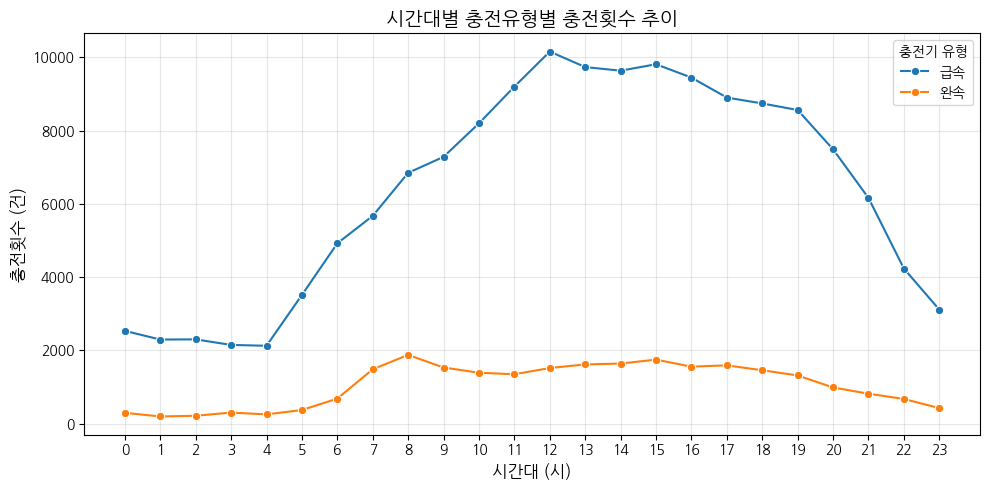

In [ ]:
# 시간대별 충전횟수(세션 수) 그래프

# times에서 시간대(hour) 추출
times['hour'] = times['start_time'].dt.hour

# sessions에서 충전소별 유형 정보 가져오기
sessions_type = sessions[['station_name', 'charger_type']].drop_duplicates()

# 조인
times_sessions = times.merge(
    sessions_type,
    on='station_name',
    how='inner'
)

# 시간대별, 충전유형별 세션 수 집계
usage_count = (
    times_sessions
    .groupby(['hour', 'charger_type'], as_index=False)['station_name']
    .count()
    .rename(columns={'station_name': 'session_count'})
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=usage_count,
    x='hour',
    y='session_count',
    hue='charger_type',
    marker='o',
    ci=None
)

plt.title('시간대별 충전유형별 충전횟수 추이', fontsize=14)
plt.xlabel('시간대 (시)', fontsize=12)
plt.ylabel('충전횟수 (건)', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='충전기 유형')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 충전 유형별 분석 
- 충전 유형별 충전량 기준 이용률
- 충전 유형별 충전횟수 기준 이용률
- 각 구별 급속·완속 충전량 비교

### 결론
- 급속 충전이 전체적으로 높은 비중을 차지함
- 급속은 짧은 시간에 여러 번 회전 가능해서, 하루 이용량 총합이 큰 것으로 예상됨 
- 중구, 강남구, 양천구, 노원구 등은 급속 충전량이 특히 많음
- 송파구, 종로구, 강북구, 구로구 등은 완속 충전량이 상대적으로 높음

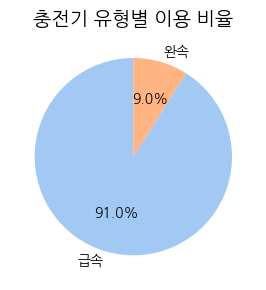

In [29]:
# 충전기 유형별 충전량 기준 이용 비율 
type_usage = (
    sessions.groupby('charger_type')['energy_kwh']
    .sum()
    .reset_index()
    .sort_values('energy_kwh', ascending=False)
)

type_usage['ratio'] = type_usage['energy_kwh'] / type_usage['energy_kwh'].sum() * 100

plt.figure(figsize=(3, 3))
plt.pie(
    type_usage['energy_kwh'],
    labels=type_usage['charger_type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('충전기 유형별 이용 비율', fontsize=14)
plt.tight_layout()
plt.show()

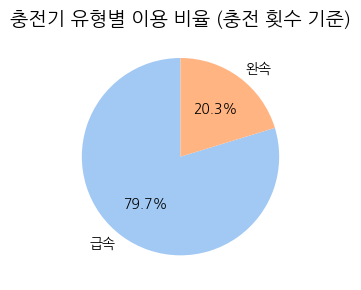

In [48]:
# 충전 유형별 충전 횟수 기준 이용 비율
count_usage = (
    sessions.groupby('charger_type')['energy_kwh']
    .count()
    .reset_index()
    .rename(columns={'energy_kwh': 'count'})
    .sort_values('count', ascending=False)
)

count_usage['ratio'] = count_usage['count'] / count_usage['count'].sum() * 100

plt.figure(figsize=(3, 3))
plt.pie(
    count_usage['count'],
    labels=count_usage['charger_type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('충전기 유형별 이용 비율 (충전 횟수 기준)', fontsize=14)
plt.tight_layout()
plt.show()


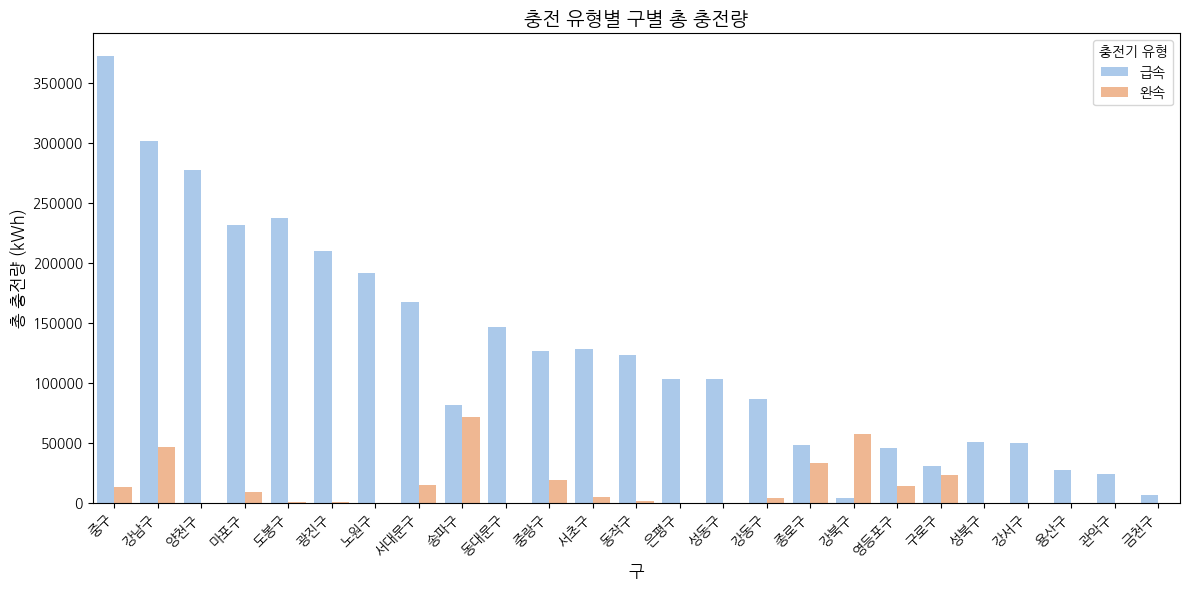

In [ ]:
# 충전 유형별 구별 충전량

# 구 추출
stations['gu'] = stations['address'].str.split().str[1]

# sessions에 구 정보 붙이기 
sessions_geo = sessions.merge(
    stations[['station_name', 'gu']],
    on='station_name',
    how='left'
)

# 구별, 충전유형별 충전량 합계
gu_usage = (
    sessions_geo
    .groupby(['gu', 'charger_type'], as_index=False)['energy_kwh']
    .sum()
)

# 총 충전량 기준 정렬 순서 생성
gu_order = (
    gu_usage.groupby('gu')['energy_kwh']
    .sum()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=gu_usage,
    x='gu',
    y='energy_kwh',
    hue='charger_type',
    order=gu_order,
    palette='pastel'
)
plt.title('충전 유형별 구별 총 충전량', fontsize=14)
plt.xlabel('구', fontsize=12)
plt.ylabel('총 충전량 (kWh)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='충전기 유형')
plt.tight_layout()
plt.show()

### 충전소별 분석
- 충전소별 총 충전량
- 충전량 기준 상위 top 10 충전소 

In [78]:
station_energy = (
    sessions.groupby("station_name", as_index=False)
    ["energy_kwh"].sum()
    .rename(columns={"energy_kwh": "total_energy_kwh"})
)
station_energy

,station_name,total_energy_kwh
0,50+동부캠퍼스,5988.55
1,AI 체육센터,6537.79
2,SK허브수 인근 거주자우선주차장 볼라드형 충전소,6923.23
3,가산 공영주차장,6379.35
4,강남구 압구정 나들목 앞 가로등형 충전기,95016.04
...,...,...
191,홍제동 주영빌딩 앞 전기차 충전소(가로등),16395.58
192,화곡본동주민센터,12455.24
193,화창운수 앞 가로등형 충전소,26924.09
194,훈련원공원 노상공영주차장(가로등),36282.30


In [82]:
merged = pd.merge(
    stations,
    station_energy,
    on="station_name",
    how="inner"     
)

result = merged[["station_name", "latitude", "longitude", "total_energy_kwh"]].sort_values("total_energy_kwh", ascending=False)
print(result)

               station_name    gu   latitude   longitude  total_energy_kwh
175                양재솔라스테이션   서초구  37.467922  127.034738         102688.34
160  강남구 압구정 나들목 앞 가로등형 충전기   강남구  37.530745  127.041305          95016.04
154    어린이대공원 구의문 주차장 복합충전소   광진구  37.545392  127.084795          86628.93
96         청계5 노상공영주차장(가로등)    중구  37.568736  127.002306          80878.55
52                    동대문구청  동대문구  37.574922  127.039621          74145.52
..                      ...   ...        ...         ...               ...
27                  종로구구민회관   종로구  37.573396  127.014048            430.65
167               창동역 공영주차장   도봉구  37.654451  127.048304            368.96
38           수락산 근린공원 공영주차장   노원구  37.679062  127.088549            338.67
8                행운동제1공영주차장   관악구  37.479784  126.960482            168.05
26                숭인도담공영주차장   종로구  37.578468  127.021549             60.89

[186 rows x 5 columns]


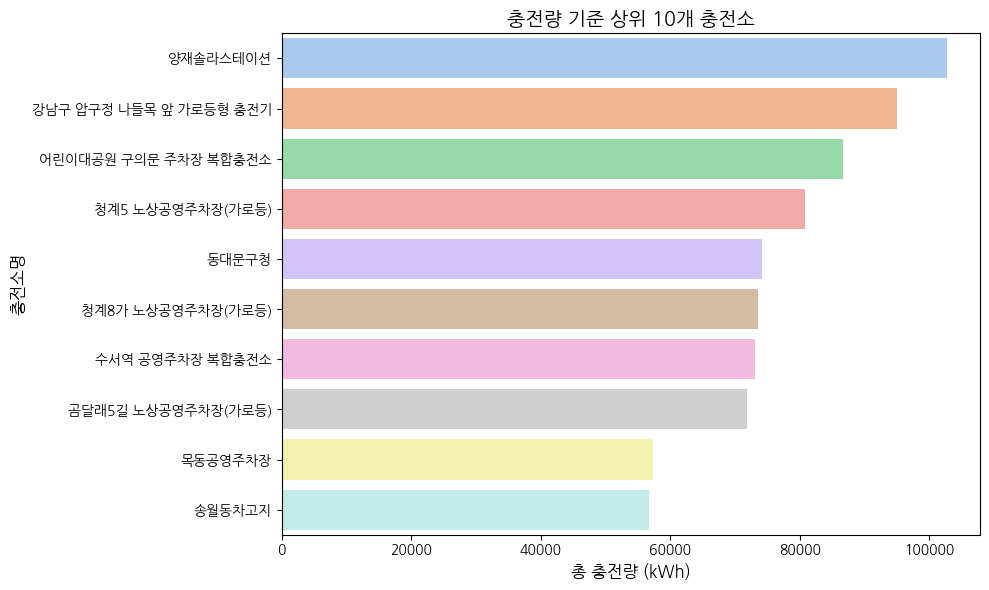

In [84]:
top10 = result.sort_values("total_energy_kwh", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    y="station_name",
    x="total_energy_kwh",
    palette="pastel"  
)
plt.title("충전량 기준 상위 10개 충전소", fontsize=14)
plt.xlabel("총 충전량 (kWh)", fontsize=12)
plt.ylabel("충전소명", fontsize=12)
plt.tight_layout()
plt.show()